In [ ]:
!pip install einops >> /dev/null

In [ ]:
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'diffusers'...
remote: Enumerating objects: 61187, done.
remote: Counting objects: 100% (14369/14369), done.
remote: Compressing objects: 100% (1134/1134), done.
remote: Total 61187 (delta 13872), reused 13292 (delta 13212), pack-reused 46818
Receiving objects: 100% (61187/61187), 41.52 MiB | 21.10 MiB/s, done.
Resolving deltas: 100% (44889/44889), done.


In [ ]:
%cd diffusers
!pip install .

/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-py3-none-any.whl size=2097583 sha256=7dbde55007bfb0901516ea7231b3cb32b992dcfcfd93e1559598472dd6c221ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-3738_gye/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers


In [ ]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
base_model_path = "misshimichka/instructPix2PixCartoon_4860_ckpt"
device = "cuda"

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    base_model_path
)
pipe.to(device)
pipe.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter_sd15.bin")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [ ]:
pipe.set_ip_adapter_scale(1)

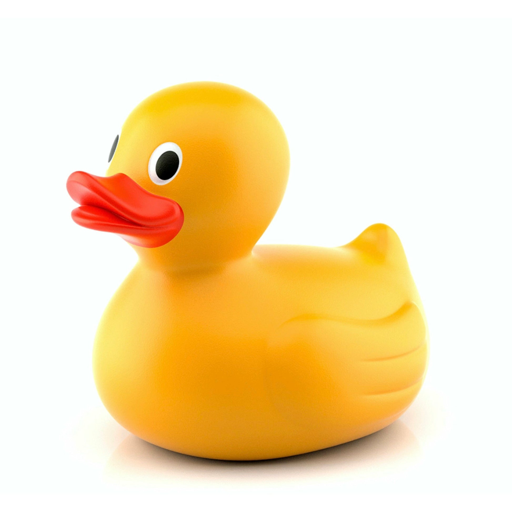

In [ ]:
import requests

img = Image.open(requests.get("https://www.shipducky.com/cdn/shop/products/Instagrampost-1a.jpg?v=1660097941&width=1946", stream=True).raw)
img = img.resize((512, 512))
img

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


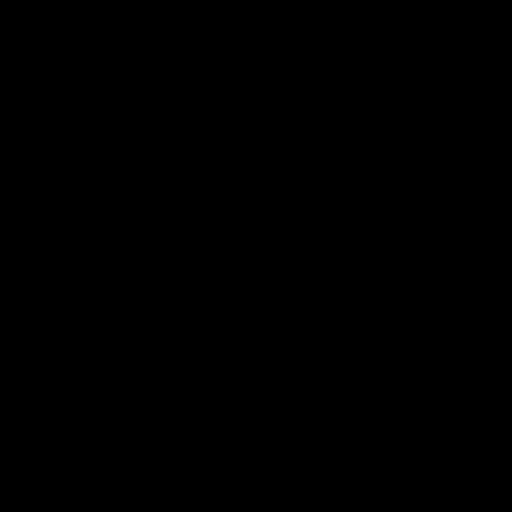

In [ ]:
images = pipe(
    prompt='recreate this image into sticker',
    image=img,
    ip_adapter_image=img,k
    num_inference_steps=50,
    guidance_scale=8,
    image_guidance_scale=8
).images[0]
images

In [ ]:
!diffusers-cli env


Copy-and-paste the text below in your GitHub issue and FILL OUT the two last points.

- `diffusers` version: 0.28.0.dev0
- Platform: Linux-5.15.133+-x86_64-with-glibc2.31
- Python version: 3.10.13
- PyTorch version (GPU?): 2.1.2 (True)
- Huggingface_hub version: 0.22.2
- Transformers version: 4.39.3
- Accelerate version: 0.29.3
- xFormers version: not installed
- Using GPU in script?: <fill in>
- Using distributed or parallel set-up in script?: <fill in>



flowers :
```
 images = pipe(
    prompt='recreate this image into sticker',
    image=img,
    ip_adapter_image=img,
    num_inference_steps=60,
    guidance_scale=8,
    image_guidance_scale=8
).images[0]
images
```